# <center>Лабораторная работа 1.</center>
## <center>Одномерная оптимизация</center>

*Автор материала: к.т.н., доцент кафедры Фундаметальной информатики и оптимального управления ВолГУ Михаил Алексеевич Харитонов*

**Цель работы:** Приобретение практических навыков поиска экстремумов функций одной переменной на языке Python с использованием Jupyter Notebook.

**Постановка задачи:** Найти  минимум (максимум) функции $f(x)$ одной переменной, т.е.
$$
f(x^*)=\min\limits_{x\in X} f(x), \quad  (f(x^*)=\max\limits_{x\in X} f(x) ), \quad X \subset R.
$$

**Задание:** Заполните ответ в клетках (где написано "Ваш код здесь" или "Ваш ответ здесь"), ответьте на вопросы.




# Часть 1 Python

## Задание 1. Коробка.




### Задание 1.1 



Как из квадратного листа картона шириной 100 см изготовить коробку (без крышки) с квадратным дном наибольшей вместительности?


$x + 2h = 100$ ; $V = x^2h$

$ h = \frac{100 - x}{2} \Rightarrow V = \frac{100x^2 - x^3}{2} $

$ V(x) = \frac{100x^2 - x^3}{2} \to max $

### Пример 1.1

В распоряжении бригадира имеется группа рабочих в составе 30 человек. Их нужно распределить на день на два объекта. Если на первом объекте работает $x$ человек, то их суточная зарплата составляет $2x^{2}$. Если на втором объекте работает $y$ человек, то их суточная зарплата составляет $4y^2$

Как нужно распределить на эти объекты рабочих, чтобы выплаты на их суточную зарплату оказались наименьшими? 


**Решение.**

Пусть на первый объект будет направлено $x$ рабочих, суточная зарплата которых составит $g(x)=2x^2$. 

Тогда на второй объект будет направлено $(30 - x)$ рабочих — суточная заработная плата составит $h(x)=4(30- x)^2$. 

В день начальник будет должен платить рабочим $f(x)=g(x)+h(x)=2x^2+4(30- x)^2$.

Задача оптимизации имеет вид:
$$f(x)= 6 x^2  - 240 x + 3600 \to \max\limits_{x\in [0,30]}$$



### Пример 1.2

Пример построения графика функции $f(x)=6 x^2  - 240 x + 3600$ на отрезке $[0,30]$.


Text(0.5, 0, 'x')

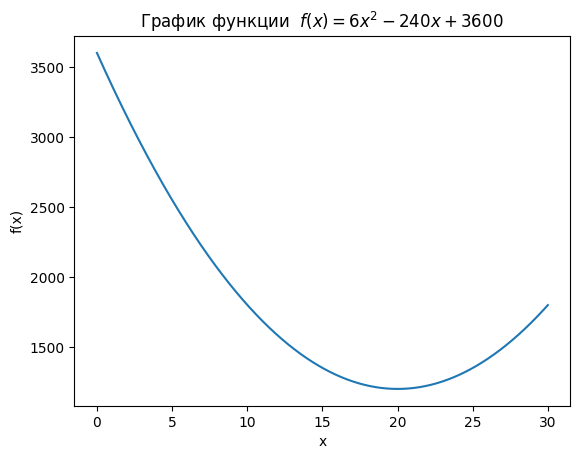

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f (x):
  return 6*x**2-240*x+3600

#шаг построения
lag = 0.01
#отрезок построения
x = np.arange(0, 30, lag)
y = f(x)
fig = plt.figure()
plt.plot(x, y)
plt.title('График функции  $f(x)=6 x^2  - 240 x + 3600$ ')
plt.ylabel('f(x)')
plt.xlabel('x')

### Задание 1.2 

С учетом получившихся ограничений, постройте график функции $V(x)$.

Text(0.5, 0, 'x')

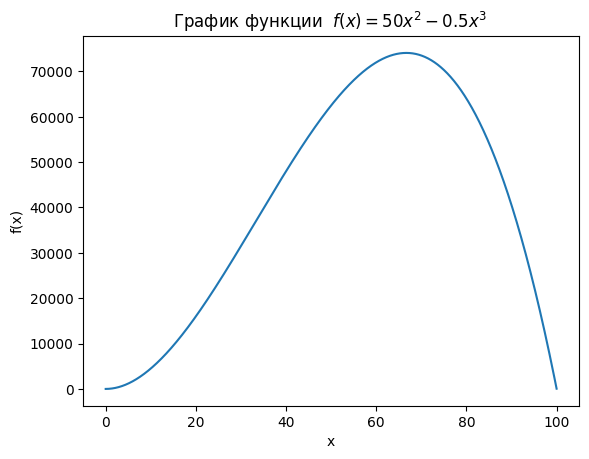

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def f (x):
  return (100*x**2-x**3)/2

#шаг построения
lag = 0.01
#отрезок построения
x = np.arange(0, 100, lag)
y = f(x)
fig = plt.figure()
plt.plot(x, y)
plt.title('График функции  $f(x) = 50x^2 - 0.5x^3$ ')
plt.ylabel('f(x)')
plt.xlabel('x')

### Алгоритм метода равномерного поиска

  **Шаг 1.** Задать начальный интервал неопределенности $[a,b]$, количество вычислений функции, $N$ --- количество вычислений функции.

 **Шаг 2.**  Вычислить точки $x_i=a+i\frac{b-a}{N+1}$, $i = \overline{1,N}$, равноотстоящие друг от друга.
 
  **Шаг 3.**  Вычислить значения функции в $N$ найденных точках: $f(x_i)$, $i = \overline{1,N}$.

**Шаг 4.**  Среди точек $x_i$,  $i = \overline{1,N}$  найти такую, в которой функция принимает наименьшее значение: $f(x_k) = \min\limits_{i = \overline{1,N}} f(x_i)$.

**Шаг 5.** Точка минимума $x^*$ принадлежит интервалу: $x^*\in[x_{k-1},x_{k+1}]$, на котором, в качестве приближенного решения, может быть выбрана точка  $x^*=x_k$.

### Задание 1.3

: Напишите функцию реализующую алгоритм поиска минимима функции методом равномерного поиска.  С помощью функции найдите максимальное значение функции $V(x)$, удовлетворяющее постановке задачи 1.1.




In [3]:
a, b = 0, 100
N = 100
V = list()
for i in range(N):
    x = a + i*(b-a)/(N+1)
    V.append([50*x**2 - 0.5*x**3,x])
print(max(V))    

[74068.64595880234, 66.33663366336634]


## Задание 2. Кусочно-линейная функция

### Задание 2.1

Постройте график функции

$
\begin{array}{l} f(x)=
{\left\{\begin{array}{l}
{-8x-7, x \in (-\infty; -5)} \\
{-6x+3, x \in [-5;-3)} \\
{-5x+6, x \in [-3;-2)} \\
{-2x+11, x \in [-2;2)} \\
{\frac{1}{2}x+6, x \in [2;8)} \\
{5x-30, x \in [8;+ \infty)}
\end{array}\right. } \end{array}
$

Text(0.5, 0, 'x')

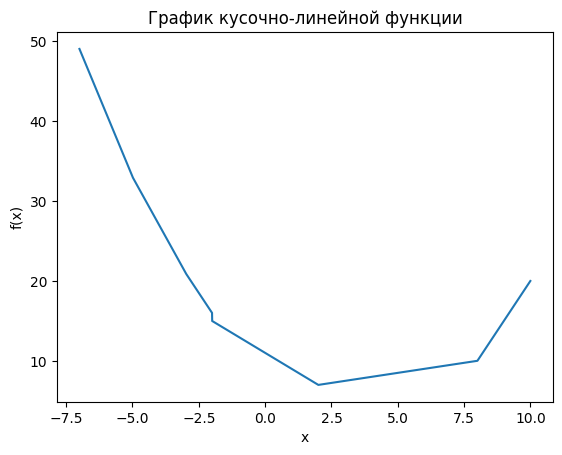

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    if x < -5: return -8*x - 7
    if -5 <= x < -3: return -6*x + 3
    if -3 <= x < -2: return -5*x + 6
    if -2 <= x < 2: return -2*x + 11
    if 2 <= x < 8: return 0.5*x + 6
    if 8 <= x: return 5*x - 30

x = np.arange(-7,10,0.001)
y = list()
for i in x:
    y.append(f(i))
fig = plt.figure()
plt.plot(x, y)
plt.title('График кусочно-линейной функции')
plt.ylabel('f(x)')
plt.xlabel('x')

### Метод деления отрезка пополам

**Шаг 1.** Задать начальный интервал неопределенности $L_0=[a,b]$ и требуемую точность $\varepsilon>0$.

**Шаг 2.** Положить $k=0$.

**Шаг 3.** Вычислить среднюю точку $x^c_k=\frac{a_k+b_k}{2}$, $|L_{2k}|=b_k-a_k$, $f(x^c_k)$.

**Шаг 4.** Вычислить точки: $y_k=a_k+\frac{|L_{2k}|}{4}$, $z_k=b_k-\frac{|L_{2k}|}{4}$, $f(y_k)$, $f(z_k)$.

**Шаг 5.** Сравнить значения $f(y_k)$ и $f(x^c_k)$:
  
*  если $f(y_k)<f(x^c_k)$, исключить интервал $(x^c_k, b_k]$, положив $b_{k+1}=x^c_k$, $a_{k+1}=a_k$. Средней точкой нового интервала становится точка $y_k$ ($x^c_{k+1}=y_k$). На **Шаг 7**.
*  если $f(y_k)\geq f(x^c_k)$, на **Шаг 6**.

**Шаг 6.** Сравнить значения $f(z_k)$ и $f(x^c_k)$:

*  если $f(z_k)<f(x^c_k)$, исключить интервал $[a_k,x^c_k)$, положив $a_{k+1}=x^c_k$, $b_{k+1}=b_k$. Средней точкой нового интервала становится точка $z_k$ ($x^c_{k+1}=z_k$). На **Шаг 7**.
*  если $f(z_k)\geq f(x^c_k)$, исключить интервалы $[a_k,y_k)$, $(z_k,b_k]$, положив $a_{k+1}=y_k$, $b_{k+1}=z_k$.  Средней точкой нового интервала становится точка $x^c_k$ ($x^c_{k+1}=x^c_k$).


**Шаг 7.** Вычислить $|L_{2(k+1)}|=b_{k+1}-a_{k+1}$ и проверить условие окончания:

*  если $|L_{2(k+1)}|\leq \varepsilon$, процесс поиска завершается.  В качестве приближенного решения можно взять середину последнего интервала $x^*=x^c_{k+1}$.
*  если $|L_{2(k+1)}|> \varepsilon$, то положить $k=k+1$ и на **Шаг 4.**


### Задание 2.2

Напишите функцию реализующую алгоритм поиска минимима функции методом деления отрезка пополам. С помощью функции найдите максимальное значение функции  $f(x)$ с точностью $10^{-3}$.

In [5]:
def f(x):
    if x < -5: return -8*x - 7
    if -5 <= x < -3: return -6*x + 3
    if -3 <= x < -2: return -5*x + 6
    if -2 <= x < 2: return -2*x + 11
    if 2 <= x < 8: return 0.5*x + 6
    if 8 <= x: return 5*x - 30

def half_optimization(a_k,b_k,epsilon):
    a_next, b_next = a_k, b_k
    k = 0
    x_answer = None
    while abs(b_next - a_next) > epsilon:
        x_middle = (a_k + b_k) / 2
        L_2k = b_k - a_k
        y_k = a_k + abs(L_2k) / 4
        z_k = b_k - abs(L_2k) / 4

        if f(y_k) < f(x_middle):
            b_next = x_middle
            a_next = a_k
            x_middle = y_k
        elif f(z_k) < f(x_middle):
            a_next = x_middle
            b_next = b_k
            x_middle = z_k
        else:
            a_next = y_k
            b_next = z_k
        k += 1
        a_k, b_k = a_next, b_next
        x_answer = x_middle
    return x_answer

a_k, b_k = -100, 100
epsilon = 1e-3
print(half_optimization(a_k,b_k,epsilon))
        

2.0000457763671875


### Метод Фибоначчи

   **Шаг 1.** Задать начальный интервал неопределенности $L_0=[a,b]$, допустимую длину конечного интервала $l>0$, константу различимости $\varepsilon > 0$.

   **Шаг 2.** Найти количество $N$ вычислений функции как наименьшее целое число, при котором выполняется условие $F_N\geq\frac{|L_0|}{l}$, и числа Фибоначчи $F_1, F_2, \ldots, F_N$.

**Шаг 3.** Положить $k=0$.

**Шаг 4.** Вычислить: $y_k=a_k+\frac{F_{N-2}}{F_N}(b_k-a_k)$, $z_k=a_0+\frac{F_{N-1}}{F_N}(b_k-a_k)$.
**Шаг 5.** Вычислить:  $f(y_k)$, $f(z_k)$.

**Шаг 6.** Сравнить значения $f(y_k)$ и $f(z_k)$:

  * если $f(y_k)\leq f(z_k)$,  положить $a_{k+1}=a_k$,  $b_{k+1}=z_k$, $z_{k+1}=y_k$, $y_{k+1}=a_{k+1}+\frac{F_{N-k-3}}{F_{N-k-1}}(b_{k+1}-a_{k+1})$ перейти на **Шаг.7**.
  * если $f(y_k)> f(z_k)$,положить $a_{k+1}=y_k$,  $b_{k+1}=b_k$, $y_{k+1}=z_k$, $z_{k+1}=a_{k+1}+\frac{F_{N-k-2}}{F_{N-k-1}}(b_{k+1}-a_{k+1})$.

**Шаг 7.** Проверить условие окончания, в случае необходимости сделать заключительное $N$-e вычисление функции для получения решения:
  * если $k\neq N-3$, положить $k=k+1$ и на **Шаг. 5**.
  * если $k=N-3$, то всегда $y_{N-2}=z_{N-2}=\frac{a_{N-2}+b_{N-2}}{2}$, т.е. отсутствует точка нового вычисления функции. 
  Следует положить: $y_{N-1}=y_{N-2}=z_{N-2}$, $z_{N-1}=y_{N-1}+\varepsilon$. В точках $y_{N-1}$  и $z_{N-1}$ вычисляются значения функции и находятся границы конечного интервала неопределенности:
  * если $f(y_N-1)\leq f(z_N-1)$,  положить $a_{N-1}=a_{N-2}$,  $b_{N-1}=z_{N-1}$.
  * если $f(y_k)> f(z_k)$, положить $a_{N-1}=y_{N-1}$,  $b_{N-1}=b_{N-2}$.


Процесс поиска завершается и $x^*\in [a_{N-1},b_{N-1}]$.	В качестве приближенного решения можно взять любую точку последнего интервала, например, его середину $x^*=\frac{b_{N-1}+a_{N-1}}{2}$.


### Задание 2.2

Напишите функцию реализующую алгоритм поиска минимима функции методом Фибоначчи. С помощью функции найдите максимальное значение функции  $f(x)$ с точностью $10^{-3}$.

In [6]:
def f(x):
    if x < -5: return -8*x - 7
    if -5 <= x < -3: return -6*x + 3
    if -3 <= x < -2: return -5*x + 6
    if -2 <= x < 2: return -2*x + 11
    if 2 <= x < 8: return 0.5*x + 6
    if 8 <= x: return 5*x - 30

def fibonacci_numbers(n):
    if N <= 0: return [0]
    if N == 1: return [1]
    fib = [0, 1]
    for i in range(2, n+1):
        fib.append(fib[-1] + fib[-2])
    return fib

def fib_optimization(a_k,b_k,epsilon):
    N = 0
    while fibonacci_numbers(N)[-1] < (b_k - a_k) / epsilon:
        N += 1
    fib = fibonacci_numbers(N)
    k = 0
    y_k = a_k + fib[-3] / fib[-1] * (b_k - a_k)
    z_k = a_k + fib[-2] / fib[-1] * (b_k - a_k)
    f_y = f(y_k)
    f_z = f(z_k)
    while k < N - 3:
        if f_y > f_z:
            a_next = y_k
            b_next = b_k
            y_next = z_k
            z_next = a_next + fib[N-k-2] / fib[N-k-1] * (b_next - a_next)
            f_y = f_z
            f_z = f(z_next)
        else:
            a_next = a_k
            b_next = z_k
            z_next = y_k
            y_next = a_next + fib[N-k-3] / fib[N-k-1] * (b_next - a_next)
            f_z = f_y
            f_y = f(y_next)
        a_k, b_k, y_k, z_k = a_next, b_next, y_next, z_next
        k += 1

    y_k = z_k = (a_k + b_k) / 2
    y_next = y_k
    z_next = y_next + epsilon
    f_y = f(y_next)
    f_z = f(z_next)
    if f_y <= f_z:
        a_next = a_k
        b_next = z_next
    else:
        a_next = y_next
        b_next = b_k

    return (a_next + b_next) / 2

a_k, b_k = -100, 100
epsilon = 1e-3
print(fib_optimization(a_k,b_k,epsilon))


2.000430776467781


## Задание 3 Оптимизация средствами python

### 3.1 Функция `minimize_scalar`




В библиотеке SciPy (Release 1.7.1 August 01, 2021) для решения задач одномерной оптимизации используется функция `minimize_scalar`.

Синтаксис обращения к функции `minimize_scalar` зависит от количества входных и выходных аргументов функции:
```
scipy.optimize.minimize_scalar(fun, bounds=None, args=(), method='brent', tol=None,
options=None)
```
Параметры

*   **fun** - целевая функция одной переменной.

*   **bounds** - границы оптимизации, содержит два  элемента, которые соответствуют границам оптимизации. Данный параметр является обязательным для метода `bounded`.
*    **args** - дополнительные аргументы, которые нужно передать в целевую функцию.
*    **method** - алгоритм, используемый для решения задачи. Поддерживаются следующие алгоритмы:  `Brent`(Метод Брента), `Bounded`, `Golden` (метод золотого сечения), custom - a callable object (added in version 0.14.0).
*   **tol** - критерий останова.
* **options** - словарь вариантов решения.
    * **maxiter** - максимальное количество итераций для выполнения алгоритма.
    * **disp** - булева переменная, которая указывает на сходимость алгоритма.

Возвращаемые значения
*  **res** - вывод результата оптимизации  в виде объекта
    * **x** - точка минимума.
    * **fun** - значение целевой функции в точке минимума.
    * **success** - логический флаг, указывающий, успешно ли завершился оптимизатор.
    * **message** - сообщение описывающее причину завершения. 




### Пример (minimize_scalar)

С помощью `minimize_scalar` найти решение следующей задачи одномерной оптимизации
$f(x)= 6 x^2  - 240 x + 3600 \to \max\limits_{x\in [0,30]}$

In [7]:
import numpy as np
from scipy.optimize import minimize_scalar
def f (x):
    return 6*x**2-240*x+3600

result = minimize_scalar(f, bounds=(0, 30), method='bounded')
print(result)
print(result.x)

 message: Solution found.
 success: True
  status: 0
     fun: 1200.0
       x: 20.000000000000004
     nit: 6
    nfev: 6
20.000000000000004


### Задание 3.1

С помощью `minimize_scalar`    найдите максимальное значение функции  $f(x)$ с точностью $10^{-3}$.

In [10]:
import numpy as np
from scipy.optimize import minimize_scalar
def f(x):
    if x < -5: return -8*x - 7
    if -5 <= x < -3: return -6*x + 3
    if -3 <= x < -2: return -5*x + 6
    if -2 <= x < 2: return -2*x + 11
    if 2 <= x < 8: return 0.5*x + 6
    if 8 <= x: return 5*x - 30

result = minimize_scalar(f, bounds=(-100, 100), method='bounded')
print(result)
print(result.x)

 message: Solution found.
 success: True
  status: 0
     fun: 7.000000406386549
       x: 2.0000008127730986
     nit: 38
    nfev: 38
2.0000008127730986




# Часть 2 Решение задач

1. Для функции $y(x)=kx+b$ заданной при  $x\in [-\frac{\pi}{2}; \frac{3\pi}{2}]$ определить при каких значениях параметра $k$ функция достигает максимального значения при $x=-\frac{\pi}{2}, 0 , \frac{3\pi}{2}$.
2. Найти наибольшее значение функции $y(x)=3 \sqrt{3} \sin x - 6 $ на отрезке  $[-\frac{\pi}{4}; \frac{3\pi}{4}]$
3. Найти экстремум функции $f(x)=|x|e^{-|x|}$ при $x \in [-2;2]$.
4. Найти минимум функции $f(x)=2x^2-12x+1$ методом деления интервала пополам, решение изобразить графически.
5. Приведите примеры функций, которые удовлетворяют следующим условиям:
       a) локальные минимумы и максимумы достигаются в бесконечном числе точек;
       б) функция ограничена, абсолютный максимум достигается, минимум - нет;
       в) функция ограничена, но абсолютные максимум и минимум не достигаются.
6. Имеется веревка длиной $l$ метров. Требуется оградить этой веревкой прямоугольный участок максимальной площади. Найдите стороны этого участка и площадь.
7. Среди конусов, описанных около шара радиуса $r$, найти тот, объем которого является наименьшим.
8. В 1-е классы поступает 70 человек: 30 мальчиков и 40 девочек. Их распределили по двум классам: в одном должно получиться 40 человек, а в другом - 30. После распределения посчитали процент девочек в каждом классе и полученные числа сложили. 
       а)  Каким должно быть распределение по классам, чтобы полученная сумма была наибольшей?
       б)  Каким должно быть распределение по классам, чтобы полученная сумма была наименьшей?
9.  Определите значение параметра $a$ в уравнении $x^2-ax+a-1=0$, при котором значение $x^2_1+x^2_2$ минимально ($x_1, x_2$ - корни уравнения, $а$ - действительное число) ?
10. При каких значениях $x$ функция $f(x)=\sin x-\cos^2 x -1$ принимает наибольшее и наименьшее значение?
11. Найдите наибольшее и наименьшее значения выражения $\log_2^4 x+12\log_2^2 x\cdot \log_2 \frac{2}{8}$, полагая, что $x$ изменяется от 1 до 64.
12. Найти минимум функции $f(x)=x^2+5x+11$ методом равномерного поиска, решение изобразить графически.
       

# Часть 3 Теоретический минимум

## Теоретический минимум по методам оптимизации



1.   Что такое необходимые условия существования экстремума первого порядка?
2.   Опишите причины не эффективности применения необходимых и достаточных условий безусловного экстремума для решения большинства практических задач.
3. Какой вид имеет общее правило построения последовательности $\{x^k\}$? (все переменные пояснить)
4. Каким свойством должны обладать точки последовательности $\{x^k\}$?
5. Какому условию должно удовлетворять направление спуска $d_k$ при решении задачи безусловной минимизации?
6. Какая последовательность  $x^{k}$ называется минимизирующей?
7. Какая последовательность  $x^{k}$ называется сходящейся к точке минимума $x^*$?
8. В чем заключается задача оптимизации?
9. Какие условия называются необходимыми и достаточными условиями безусловного экстремума функции?
10. Что такое точка глобального минимума функции?
11. Что такое точка локального минимума функции?
12. Какая функция называется выпуклой?
13. Чем характеризуется порядок методов поиска безусловного экстремума?
14. Какая функция называется унимодальной?




## Теоретический минимум python

1. Для каких целей используется функция np.arange? 
2. Что будет выведено на экран при выполнении `print (np.arange(0, 10, 1)` ?
3. Какие параметры для функции `minimize_scalar` являются обязательными?
4. Опишите вызов функции `minimize_scalar` для вывода на экран только значения $f(x^*)$?
5. Опишите вызов функции `minimize_scalar` для вывода на экран только значения $x^*$?
6. Для чего используется параметр `bounds` в функции `minimize_scalar`?
7. Какие методы оптимизации можно использовать  функции `minimize_scalar`?
8. Можно ли с помощью функции `minimize_scalar` найти точку максимума непрерывной функции? Если можно, то как?

